<a href="https://colab.research.google.com/github/mohityadav11a/asteroid_spectra/blob/main/4_spectra_viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Spectra Viewer

With the data parsed, we can now explore overlapping spectral views from the Bus and Main Group classifications to gain insights into the structure of the dataset.

In [1]:
# Importing libraries
import os
import ipywidgets
from matplotlib import pyplot as plt
import pandas as pd

# Mount the Google Drive
try:
    from google.colab import drive
    drive.mount('/gdrive')
    core_path = "/gdrive/MyDrive/colab/asteroid_taxonomy/"
except ModuleNotFoundError:
    core_path = ""

# Reading the data
asteroids_df = pd.read_pickle(os.path.join(core_path, "data/lvl2/", "asteroids.pkl"))

asteroids_df

Mounted at /gdrive


,Name,Bus_Class,SpectrumDF,Main_Group
0,1 Ceres,C,Wavelength_in_microm Reflectance_norm550n...,C
1,2 Pallas,B,Wavelength_in_microm Reflectance_norm550n...,C
2,3 Juno,Sk,Wavelength_in_microm Reflectance_norm550n...,S
3,4 Vesta,V,Wavelength_in_microm Reflectance_norm550n...,Other
4,5 Astraea,S,Wavelength_in_microm Reflectance_norm550n...,S
...,...,...,...,...
1334,1996 UK,Sq,Wavelength_in_microm Reflectance_norm550n...,S
1335,1996 VC,S,Wavelength_in_microm Reflectance_norm550n...,S
1336,1997 CZ5,S,Wavelength_in_microm Reflectance_norm550n...,S
1337,1997 RD1,Sq,Wavelength_in_microm Reflectance_norm550n...,S


# Plot individual Bus-Class spectra
The following code block allows one to plot Bus-Classes and Main Group spectra, merged into a single figure

interactive(children=(Dropdown(description='top_class', options=('Bus_Class', 'Main_Group'), value='Bus_Class'…

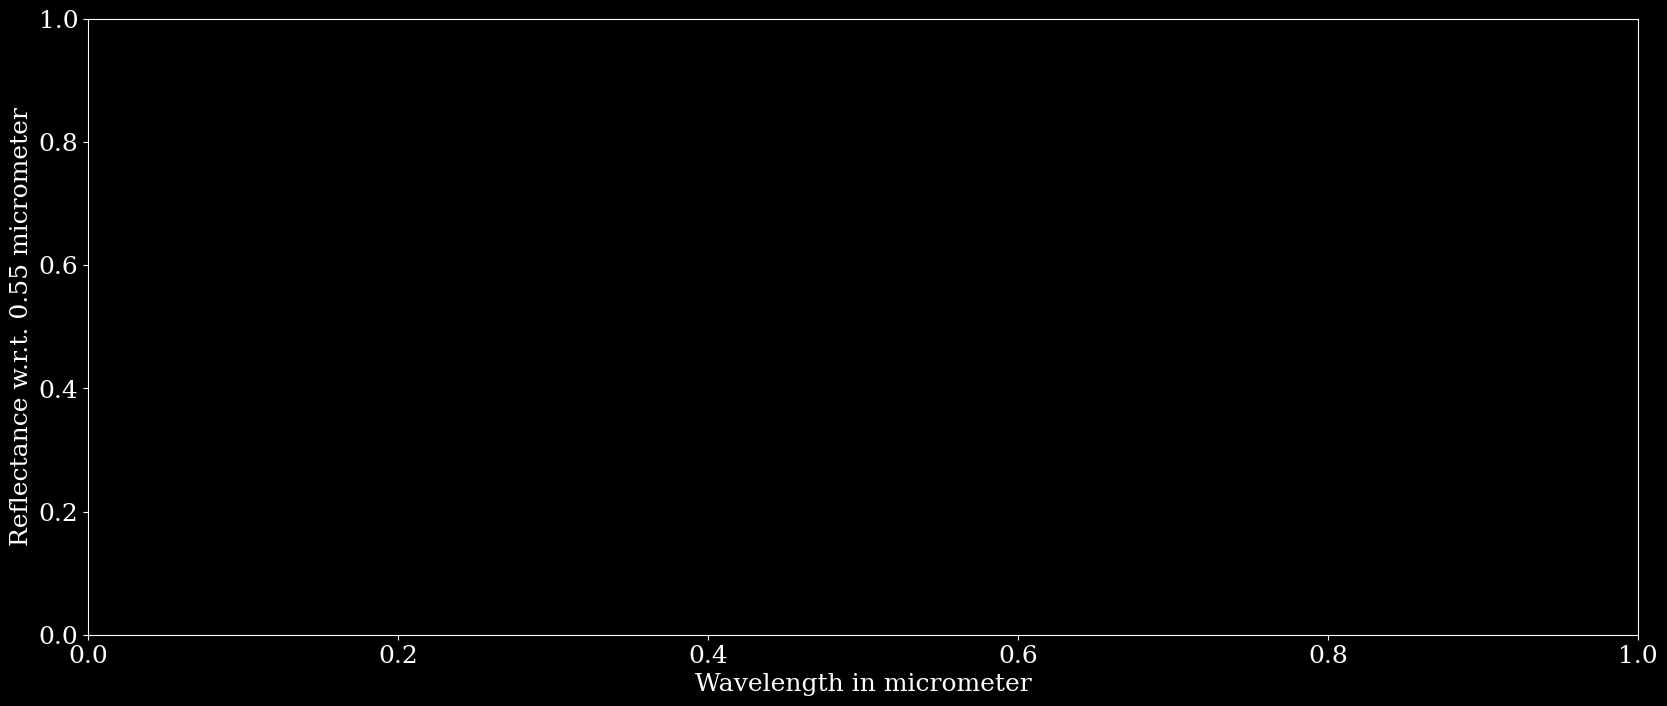

In [ ]:
# Setting up Interactive widgets
top_class_widget = ipywidgets.Dropdown(options = ['Bus_Class', 'Main_Group'])
sub_class_widget = ipywidgets.Dropdown()

# Define a function that updates the content of the sub class based on the top class selection
def update_sub_class(*args):
    sub_class_widget.options = sorted(asteroids_df[top_class_widget.value].unique())
top_class_widget.observe(update_sub_class)

# Set the dark mode and the font size and style
plt.style.use('dark_background')
plt.rc('font', family='serif', size=18)

# Set a function for the (interactive) plots
def plot_single_spec(top_class, sub_class, ylim_fixed=False):

    # Create a "wide screen figure"
    plt.figure(figsize=(20,8))

    # Get the number of available spectra. This value is later used to adjust the alpha value ...
    nr_of_spec = float(len(asteroids_df[top_class]==sub_class))

    print(f"Number of ({top_class}) {sub_class} spectra: {nr_of_spec}")

    # We do not want to exaggerate it with the transperancy!
    if nr_of_spec > 10:
        nr_of_spec = 10

    asteroids_filtered_df = asteroids_df.loc[asteroids_df[top_class]==sub_class]

    # Iterate trough the spectra and plot them
    for _, row in asteroids_filtered_df.iterrows():

        plt.plot(row["SpectrumDF"]["Wavelength_in_microm"],
                 row["SpectrumDF"]["Reflectance_norm550nm"],
                 alpha=1.0/nr_of_spec,
                 color='#ccebc4')

    # Set labels
    plt.xlabel("Wavelength in micrometer")
    plt.ylabel("Reflectance w.r.t. 0.55 micrometer")

    # Set a fixed y limit range if requested
    if ylim_fixed:
        plt.ylim(0.5, 1.5)

    # Properties
    plt.xlim(min(row["SpectrumDF"]["Wavelength_in_microm"]),
             max(row["SpectrumDF"]["Wavelength_in_microm"]))
    plt.grid(linestyle="dashed", alpha=0.3)

    plt.show()

# Creating an interactive plot.
ipywidgets.interactive(plot_single_spec,
                       top_class=top_class_widget,
                       sub_class=sub_class_widget,
                       ylim_fixed=False)

# Statistics




In [ ]:
# Simple description
asteroids_df[["Bus_Class", "Main_Group"]].describe()



,Bus_Class,Main_Group
count,1339,1339
unique,25,4
top,S,S
freq,383,549


In [ ]:
# Statistics for the Bus Class
asteroids_df.groupby(["Main_Group", "Bus_Class"])["Bus_Class"].agg(["count"])

count
Main_Group Bus_Class       
C          B             60
           C            141
           Cb            33
           Cg             9
           Cgh           15
           Ch           138
Other      A             16
           D              9
           K             31
           L             34
           Ld            13
           O              1
           R              4
           T             14
           V             35
S          S            383
           Sa            34
           Sk            16
           Sl            49
           Sq            52
           Sr            15
X          X            110
           Xc            60
           Xe            28
           Xk            39

In [ ]:
# Statistics for the Main Group
asteroids_df.groupby(['Main_Group'])["Main_Group"].agg(['count'])

,count
Main_Group,
C,396
Other,157
S,549
X,237


# Summary
By applying basic descriptive statistics, we observed that the Bus-Class taxonomy contains highly underrepresented categories — for example, the O-Class and R-Class have only 1 and 4 spectra, respectively. Since we aim to perform classification, such class imbalance could introduce significant bias into the training, validation, and test sets.

To mitigate this, we will proceed using only the Main Group classification for the upcoming analysis. However, we will retain the Bus-Class data for potential deeper investigation after the classification phase.